#### Data Science techniques
A collection of data science techniques for practicing for interviews. This notebook consists of the following:

#### Confusion matrix
What are the following and when to rely on which one for model building?
* **Sensitivity** = **Recall** = **True positive rate (TPR)** = Fraction of the truly positives that are classified positive = $\frac{True positive}{True positive + False negative}$
* **Specificity** = **1 - False positive rate (FPR)** = Fraction of truly negatives that are classified negative = $\frac{True negative}{True negative + False positive}$
* **Precision** = Out of all positive predictions, how many were correct = $\frac{True positive}{True positive + False positive}$

For recall, think about the truth as the base/denominator, and for precision, think about predictions as your base

* ROC curve
* prediction-recall curve

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
from sklearn.model_selection import train_test_split

/Users/tanviranjan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


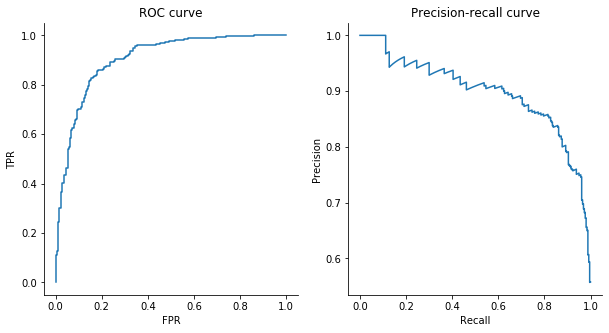

In [10]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.5,random_state=2)
model = LogisticRegression().fit(Xtrain,ytrain);
lr_probs = model.predict_proba(Xtest);
lr_probs = lr_probs[:,1]; # probability of predicting the first class
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs);
lr_precision, lr_recall,_ = precision_recall_curve(ytest, lr_probs);

f,ax = plt.subplots(1,2,figsize=(10,5));
ax[0].plot(lr_fpr, lr_tpr); ax[0].set_xlabel('FPR'); ax[0].set_ylabel('TPR');
ax[0].set_title('ROC curve');

ax[1].plot(lr_recall, lr_precision);ax[1].set_ylabel('Precision'); ax[1].set_xlabel('Recall');
ax[1].set_title('Precision-recall curve'); sns.despine()

It's beneficial to use the precision-recall curve for imbalanced data, because precision cares about the predictions more than recall